In [2]:
import matplotlib
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import scipy
import scipy.interpolate
import mne
import scipy
import statistics
from pywt import wavedec
from scipy import signal
import matplotlib.colors as mcolors
import random
import seaborn as sns
import os
from scipy import stats
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
from numpy import asarray
from numpy import savetxt
import pickle

In [21]:
raw=mne.io.read_raw_eeglab('Files/Preprocessed/sub-010049_EC.set', preload=True, verbose=True)

Reading Files/Preprocessed/sub-010049_EC.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...


In [22]:
print(raw)
print(raw.info)


<RawEEGLAB | sub-010049_EC.fdt, 61 x 120000 (480.0 s), ~56.0 MB, data loaded>
<Info | 8 non-empty values
 bads: []
 ch_names: Fp1, Fp2, F7, F3, Fz, F4, F8, FC5, FC1, FC2, FC6, T7, C3, Cz, ...
 chs: 61 EEG
 custom_ref_applied: False
 dig: 61 items (61 EEG)
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: unspecified
 nchan: 61
 projs: []
 sfreq: 250.0 Hz
>


Effective window size : 8.192 (s)


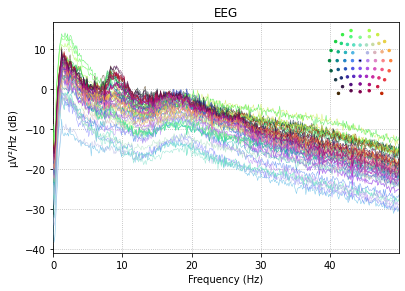

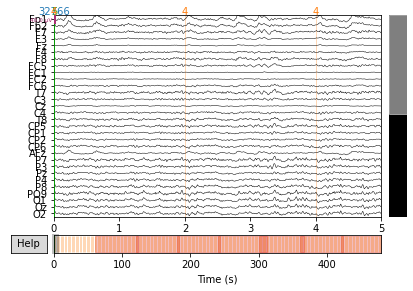

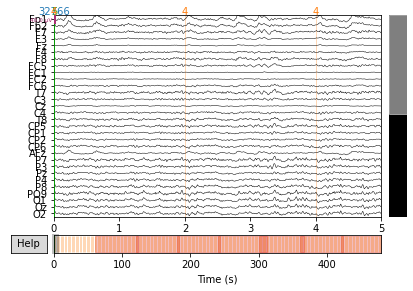

In [23]:
raw.plot_psd(fmax=50)
raw.plot(duration=5, n_channels=30)

Fitting ICA to data using 61 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Selecting by number: 20 components
Fitting ICA took 2.7s.
    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
Not setting metadata
240 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
Not setting metadata
240 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


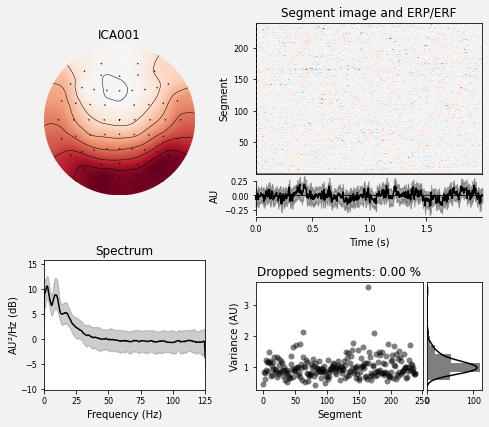

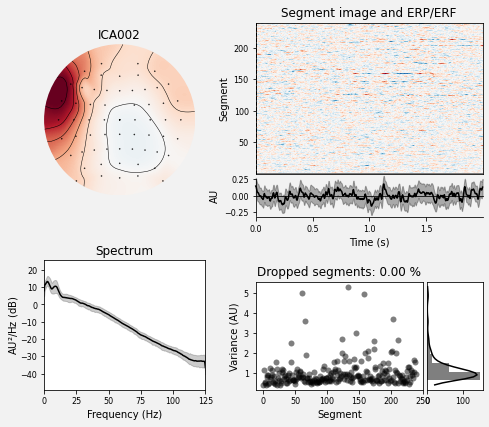

[<Figure size 504x432 with 6 Axes>, <Figure size 504x432 with 6 Axes>]

In [24]:
# set up and fit the ICA
ica = mne.preprocessing.ICA(n_components=20, random_state=97, max_iter=800)
ica.fit(raw)
ica.exclude = [1, 2]  # details on how we picked these are omitted here
ica.plot_properties(raw, picks=ica.exclude)

In [45]:
for i in chanles_names:
    events = mne.events_from_annotations(raw)
    # print(events[:5])  # show the first 5
print(events[0][:5])


Used Annotations descriptions: ['32766', '4', '5', 'boundary']
Used Annotations descriptions: ['32766', '4', '5', 'boundary']
Used Annotations descriptions: ['32766', '4', '5', 'boundary']
Used Annotations descriptions: ['32766', '4', '5', 'boundary']
Used Annotations descriptions: ['32766', '4', '5', 'boundary']
Used Annotations descriptions: ['32766', '4', '5', 'boundary']
Used Annotations descriptions: ['32766', '4', '5', 'boundary']
Used Annotations descriptions: ['32766', '4', '5', 'boundary']
Used Annotations descriptions: ['32766', '4', '5', 'boundary']
Used Annotations descriptions: ['32766', '4', '5', 'boundary']
Used Annotations descriptions: ['32766', '4', '5', 'boundary']
Used Annotations descriptions: ['32766', '4', '5', 'boundary']
Used Annotations descriptions: ['32766', '4', '5', 'boundary']
Used Annotations descriptions: ['32766', '4', '5', 'boundary']
Used Annotations descriptions: ['32766', '4', '5', 'boundary']
Used Annotations descriptions: ['32766', '4', '5', 'bou

In [48]:
epochs = mne.Epochs(raw, events[0], event_id=None, tmin=0, tmax=0.5,
                    reject=None, preload=True, event_repeated="merge", baseline=(0, 0))

Not setting metadata
Multiple event values for single event times found. Creating new event value to reflect simultaneous events.
Not setting metadata
240 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 240 events and 126 original time points ...
0 bad epochs dropped


In [56]:
print(epochs[2])
# vis_epochs = epochs[]
# vis_epochs.plot_image(picks=['MEG 1332', 'EEG 021'])


<Epochs |  1 events (all good), 0 - 0.5 sec, baseline [0, 0], ~219 kB, data loaded,
 '2': 1>


In [57]:
data = epochs._data

In [58]:
data

array([[[ 0.00000000e+00,  1.63440645e-07,  7.76010334e-07, ...,
         -9.24317592e-06, -1.13273014e-05, -1.22179942e-05],
        [ 0.00000000e+00,  7.64516830e-07,  1.40534973e-06, ...,
         -7.47384667e-06, -9.61024570e-06, -1.08439417e-05],
        [ 0.00000000e+00, -6.02521181e-07, -5.54168224e-08, ...,
         -9.23511434e-06, -1.02634013e-05, -9.43434501e-06],
        ...,
        [ 0.00000000e+00,  2.15416431e-06,  2.62803173e-06, ...,
         -7.19736791e-06, -8.82461667e-06, -1.01016158e-05],
        [ 0.00000000e+00,  2.97190094e-06,  4.11278534e-06, ...,
         -7.44470882e-06, -9.18269157e-06, -1.04813769e-05],
        [ 0.00000000e+00,  2.71358490e-06,  3.45503902e-06, ...,
         -8.60981679e-06, -1.05738850e-05, -1.22147729e-05]],

       [[ 0.00000000e+00,  1.19472682e-06,  2.68012303e-06, ...,
         -6.60154009e-06, -5.40758848e-06, -5.11948729e-06],
        [ 0.00000000e+00,  4.38941717e-07,  1.20783246e-06, ...,
         -5.53657532e-06, -4.41255808e

In [60]:

x=data
fs=250
fmin=4
fmax=8
f, Pxx = scipy.signal.periodogram(x, fs=fs)
ind_min = scipy.argmax(f > fmin) - 1
ind_max = scipy.argmax(f > fmax) - 1
retu = scipy.trapz(Pxx[ind_min: ind_max], f[ind_min: ind_max])